In [15]:
import pandas as pd
import numpy as np
import geopandas as gpd

import geoplot as gplt
import matplotlib as plt

In [16]:
population = pd.read_csv('mat-do-dan-so.csv')
population.rename(columns={'province' : 'ten_tinh'}, inplace=True)
population.head(10)

,ten_tinh,density
0,CẢ NƯỚC,280.0
1,Đồng bằng sông Hồng,994.0
2,Hà Nội,2182.0
3,Vĩnh Phúc,863.0
4,Bắc Ninh,1432.0
5,Quảng Ninh,198.0
6,Hải Dương,1070.0
7,Hải Phòng,1268.0
8,Hưng Yên,1258.0
9,Thái Bình,1128.0


In [17]:
population.shape

(70, 2)

In [18]:
district = gpd.read_file('diaphantinh.geojson')
district

,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."
...,...,...,...,...
58,59,AD01,Trà Vinh,"MULTIPOLYGON (((106.33031 10.01151, 106.35479 ..."
59,60,AD01,Tuyên Quang,"MULTIPOLYGON (((105.21744 22.66234, 105.21968 ..."
60,61,AD01,Vĩnh Long,"MULTIPOLYGON (((106.02713 10.28630, 106.02695 ..."
61,62,AD01,Vĩnh Phúc,"MULTIPOLYGON (((105.58500 21.53527, 105.59105 ..."


In [19]:
data = district.merge(population, on= 'ten_tinh')
data.head()

,gid,code,ten_tinh,geometry,density
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...",611.0
1,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...",426.0
2,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ...",66.0
3,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...",332.0
4,6,AD01,Bắc Ninh,"MULTIPOLYGON (((106.03246 21.22488, 106.03217 ...",1432.0


In [20]:
len(data.index)

53

Text(0, 0.5, 'Province code')

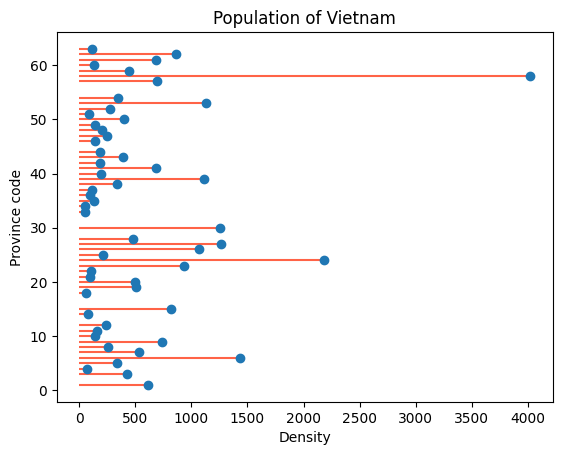

In [21]:
import matplotlib.pyplot as plt 

density = data.density
# my_range = range(1,len(data.index) + 1 )
gid = data.gid

plt.hlines(y = gid, xmin= 0, xmax=density, colors='tomato')
plt.plot(density, gid, "o")

plt.title ("Population of Vietnam")
plt.xlabel ('Density')
plt.ylabel('Province code')


In [22]:
import plotly.express as px
fig = px.bar(data, x = 'ten_tinh', y= 'density')
fig.show()